# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
wholesale_df = pd.read_csv("Wholesale_Data.csv")

In [3]:
wholesale_df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [4]:
wholesale_df.tail(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
430,1,3,3097,4230,16483,575,241,2080
431,1,3,8533,5506,5160,13486,1377,1498
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [5]:
wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
# Calculate the count of duplicate rows
duplicate_count = sum(wholesale_df.duplicated())

# Display the number of duplicate rows
print(f"There are {duplicate_count} duplicate rows.")


There are 0 duplicate rows.


In [7]:
# Count and print the values in the 'Channel' column
channel_counts = wholesale_df['Channel'].value_counts()
print(channel_counts)

# Count and print the values in the 'Region' column
region_counts = wholesale_df['Region'].value_counts()
print(f"\n{region_counts}")


Channel
1    298
2    142
Name: count, dtype: int64

Region
3    316
1     77
2     47
Name: count, dtype: int64


- Based on the initial examination of the "Wholesale_Data.csv" file, it appears that both 'Channel' and 'Region' are categorical variables. These variables are represented by integers, but they likely correspond to different categories or types of channels and regions, respectively. The values do not represent continuous or quantitative data but rather distinct categories or groups.
- For example, 'Channel' might represent different types of sales channels (like retail, online, wholesale, etc.), and 'Region' could represent different geographical regions or areas. The other columns like 'Fresh', 'Milk', 'Grocery', etc., appear to be numerical and likely represent quantities or amounts.

In [8]:
wholesale_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


#### Distribution

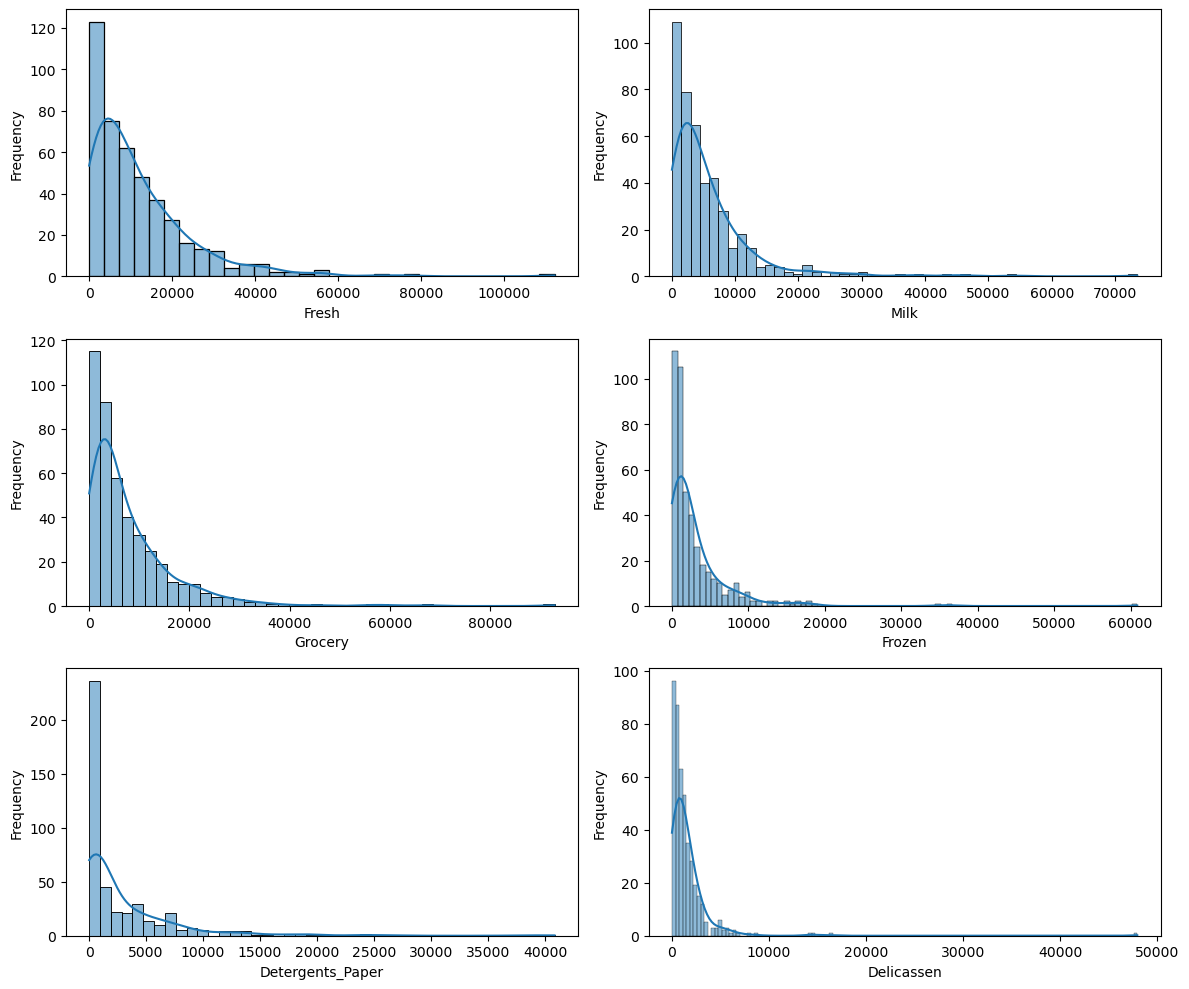

In [9]:
# plot the distributions
plt.figure(figsize=(12, 10))

# create histograms for all non-categorical variables (excludes 'Channel' and 'Region' variables)
for i, col in enumerate(wholesale_df.columns[2:]):
    plt.subplot(3, 2, i+1)
    sns.histplot(wholesale_df[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- Skewed Distributions: All histograms show a right-skewed distribution (also known as positive skew), where the majority of the data points fall on the left side of the histogram, and there's a long tail to the right. This indicates that there are a few very high values (outliers) in each of these categories.

- Common Pattern: Since all the variables show a similar distribution pattern, this could suggest that there are certain customers or observations in the dataset that consistently have higher values across multiple product categories.

- Outliers: The long tails to the right in each histogram suggest the presence of outliers. These are values that are much higher than the rest of the data and could represent large customers like big restaurants or supermarkets.

- Frequency: The y-axis represents the frequency of the observations. For all product categories, the highest frequency occurs near the origin, indicating that most customers purchase small to moderate amounts of these products.

- Order of Magnitude: The x-axis shows the range of values for each product category. 'Fresh' products have values extending up to 120,000, which is much higher than the other categories, suggesting that the 'Fresh' product category has the highest variance in purchase amounts.


- Comparison Between Categories: Some categories like 'Fresh' and 'Grocery' seem to have higher overall values compared to categories like 'Detergents_Paper' and 'Delicassen', which might suggest different scales of purchasing between these types of products.

- Data Scaling Requirement: Before applying machine learning algorithms, it may be necessary to scale the data so that each category contributes equally to the analysis, given the different ranges of values.

In [10]:
wholesale_log_df = wholesale_df.copy()

# apply logarithmic transformation to the continuous variables
for col in wholesale_df.columns[2:]:
    # add 1 to handle zero values (log10(0) = null and log10(1) = 0)
    log_transform_col = np.log(wholesale_log_df[col] + 1)

    # replace the original column with the logarithm transformed column
    wholesale_log_df[col] = log_transform_col
    
    # rename the column accordingly
    new_col_name = col + '_log'
    wholesale_log_df = wholesale_log_df.rename(columns={col: new_col_name})
    
display(wholesale_log_df.head())

,Channel,Region,Fresh_log,Milk_log,Grocery_log,Frozen_log,Detergents_Paper_log,Delicassen_log
0,2,3,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,2,3,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,2,3,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,1,3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,2,3,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718


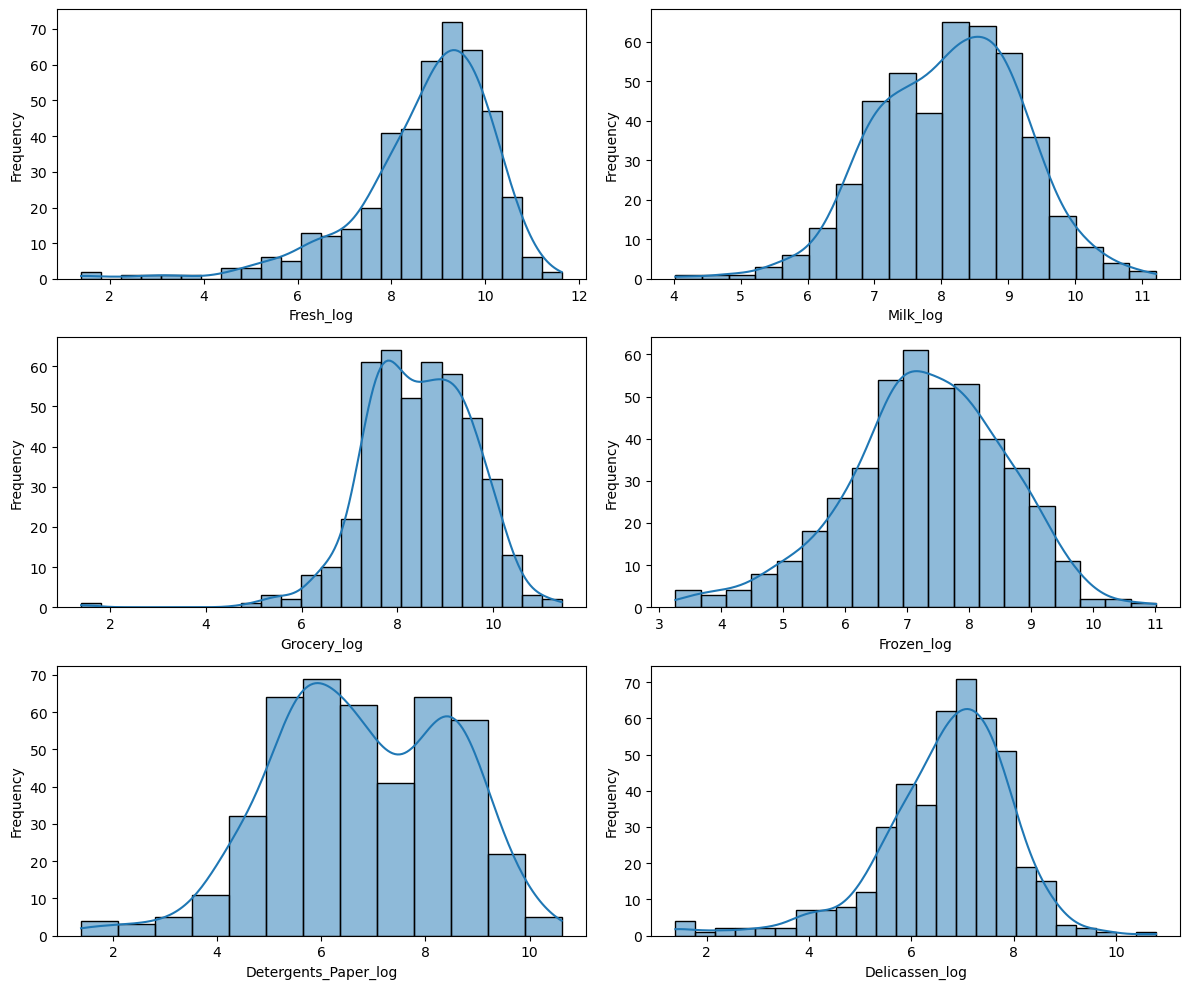

In [11]:
# replot the distributions
plt.figure(figsize=(12, 10))

# create histograms for all non-categorical variables (excludes 'Channel' and 'Region' variables)
for i, col in enumerate(wholesale_log_df.columns[2:]):
    plt.subplot(3, 2, i+1)
    sns.histplot(wholesale_log_df[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

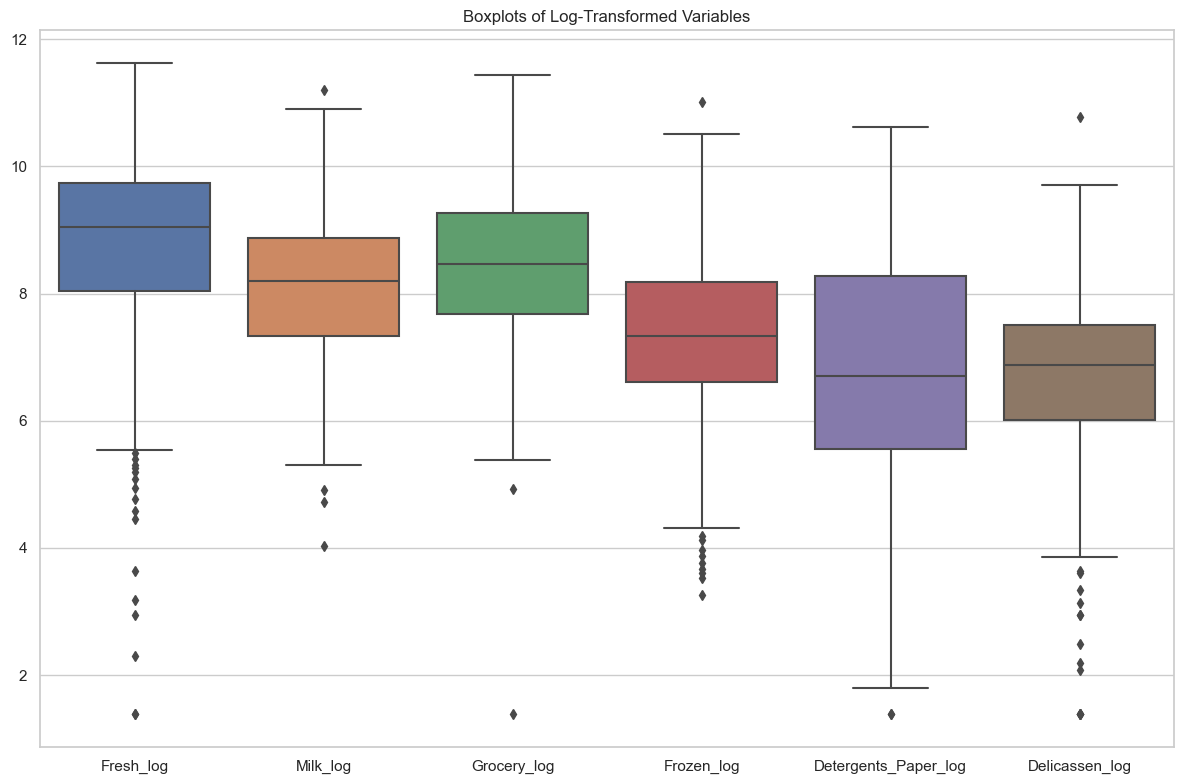

In [12]:
# boxplot for each continuous variable to identify outliers
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid") # set white background with horizontal grid lines to ease interpretability

# create a single graph with multiple boxplots
ax = sns.boxplot(data=wholesale_log_df.iloc[:, 2:], orient="v")
plt.title("Boxplots of Log-Transformed Variables")

plt.tight_layout()
plt.show()

In [13]:
# determine outlier counts
outlier_counts = {} # dictionary to store number of outliers for each continous variable

print("Number of outliers:")

for col in wholesale_log_df.columns[2:]: # exclude categorical columns
    data = wholesale_log_df[col]
    
    # calculate IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    # define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # count outliers for the current variable
    num_outliers = len(data[(data < lower_bound) | (data > upper_bound)])
    
    outlier_counts[col] = num_outliers
    print(f"{col} = {outlier_counts[col]}") # display the outlier counts for each variable

Number of outliers:
Fresh_log = 16
Milk_log = 4
Grocery_log = 2
Frozen_log = 10
Detergents_Paper_log = 2
Delicassen_log = 14



- The data for the normalized continuous variables may include outliers, and whether these outliers are valid or erroneous depends on the context of the data and its interpretation. In this specific dataset, the extreme values are not due to entry errors, measurement errors, or other anomalies.

- For instance, consider the 'Fresh_log' category in the dataset. The outliers, which are approximately less than 6, could simply indicate instances of minimal spending, which is reasonable given that individual purchasing habits can vary widely. Therefore, a decision has been made to retain these outliers in the dataset.

scaling

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the data
data = pd.read_csv('Wholesale_Data.csv')

# Assume that 'data' is a DataFrame containing the wholesale data to be scaled

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame for better readability
data_min_max_scaled = pd.DataFrame(data_min_max_scaled, columns=data.columns)

# Standard Scaling
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame for better readability
data_standard_scaled = pd.DataFrame(data_standard_scaled, columns=data.columns)

# Show the first few rows of the scaled data
print("Min-Max Scaled data:\n", data_min_max_scaled.head())
print("\nStandard Scaled data:\n", data_standard_scaled.head())


Min-Max Scaled data:
    Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0      1.0     1.0  0.112940  0.130727  0.081464  0.003106          0.065427   
1      1.0     1.0  0.062899  0.132824  0.103097  0.028548          0.080590   
2      1.0     1.0  0.056622  0.119181  0.082790  0.039116          0.086052   
3      0.0     1.0  0.118254  0.015536  0.045464  0.104842          0.012346   
4      1.0     1.0  0.201626  0.072914  0.077552  0.063934          0.043455   

   Delicassen  
0    0.027847  
1    0.036984  
2    0.163559  
3    0.037234  
4    0.108093  

Standard Scaled data:
     Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356 

In [15]:
# Define numerical columns to scale (exclude 'Channel' and 'Region')
numerical_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Apply Min-Max Scaling only to numerical columns
data_min_max_scaled[numerical_cols] = min_max_scaler.fit_transform(data[numerical_cols])

# Apply Standard Scaling only to numerical columns
data_standard_scaled[numerical_cols] = standard_scaler.fit_transform(data[numerical_cols])

# Show the first few rows of the scaled data
print("Min-Max Scaled data:\n", data_min_max_scaled.head())
print("\nStandard Scaled data:\n", data_standard_scaled.head())


Min-Max Scaled data:
    Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0      1.0     1.0  0.112940  0.130727  0.081464  0.003106          0.065427   
1      1.0     1.0  0.062899  0.132824  0.103097  0.028548          0.080590   
2      1.0     1.0  0.056622  0.119181  0.082790  0.039116          0.086052   
3      0.0     1.0  0.118254  0.015536  0.045464  0.104842          0.012346   
4      1.0     1.0  0.201626  0.072914  0.077552  0.063934          0.043455   

   Delicassen  
0    0.027847  
1    0.036984  
2    0.163559  
3    0.037234  
4    0.108093  

Standard Scaled data:
     Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356 

#### Categorical Variables

Up to this point, the categorical variables have remained unaltered. However, in order to perform an appropriate analysis involving correlation, clustering, PCA, or random forest, it is necessary to convert the categorical variables into a numerical format. This conversion can be accomplished using a technique called "one-hot encoding."

One-hot encoding is particularly valuable when there is no inherent order or ranking among categories. For example, in the case of 'Channel' and 'Region,' these variables contain distinct categories without any obvious ordinal relationship between them. For example, 'Channel' has two categories, "Horeca" and "Retail," which represent different distribution channels. Similarly, 'Region' contains categories such as "Lisbon," "Oporto," and "Other," representing various geographic regions without any inherent ranking.

One-hot encoding transforms each categorical variable into separate binary columns, creating dummy variables that indicate the presence (1) or absence (0) of a particular category. For 'Region,' for instance, it would result in three separate binary columns as follows:

'Region_1': [1, 0, 0]
'Region_2': [0, 1, 0]
'Region_3': [0, 0, 1]


This encoding allows for the inclusion of categorical data in numerical analysis methods while preserving the distinction between different categories.

In [16]:
from sklearn.preprocessing import RobustScaler # to transform data into specific scale

continuous_col = wholesale_log_df.columns[2:]

# initialize the scaler
scaler = RobustScaler() 

# fit and transform the selected continous variables
wholesale_log_scaled_data = scaler.fit_transform(wholesale_log_df[continuous_col])

# 'fit_transform' converted the DataFrame into a NumPy array, we want to convert it back
wholesale_log_scaled_df = pd.DataFrame(wholesale_log_scaled_data, columns=continuous_col)

# insert the categorical columns at positions 0 and 1, respectively
wholesale_log_scaled_df.insert(0, 'Channel', wholesale_log_df['Channel'])
wholesale_log_scaled_df.insert(1, 'Region', wholesale_log_df['Region'])

display(wholesale_log_scaled_df.head())

,Channel,Region,Fresh_log,Milk_log,Grocery_log,Frozen_log,Detergents_Paper_log,Delicassen_log
0,2,3,0.236027,0.633665,0.289970,-1.252532,0.435415,0.218358
1,2,3,-0.110429,0.643905,0.437195,0.091831,0.511868,0.407917
2,2,3,-0.172651,0.574176,0.300061,0.290501,0.535928,1.402554
3,1,3,0.263246,-0.717716,-0.074555,0.916071,-0.174744,0.412425
4,2,3,0.579134,0.258743,0.259202,0.601719,0.285389,1.125309


In [17]:
categorical_col = wholesale_log_scaled_df.columns[:2]

# convert 'Channel' and 'Region' to dummy variables
one_hot_encoded = pd.get_dummies(wholesale_log_scaled_df, columns=categorical_col, prefix=categorical_col)

# create a list of one-hot encoded columns
one_hot_cols = []

for col in one_hot_encoded:
    if col.startswith('Channel_') or col.startswith('Region_'):    
        one_hot_cols.append(col)

# reverse the order of one-hot encoded columns
one_hot_cols = one_hot_cols[::-1]

# insert the one-hot encoded columns at the beginning of the DataFrame and replace True/False with 1/0
for col in one_hot_cols:
    wholesale_log_scaled_df.insert(0, col, one_hot_encoded[col].astype(int))

# remove the original categorical columns
wholesale_log_scaled_df = wholesale_log_scaled_df.drop(columns=categorical_col)

# display the updated DataFrame
display(wholesale_log_scaled_df.head())

,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh_log,Milk_log,Grocery_log,Frozen_log,Detergents_Paper_log,Delicassen_log
0,0,1,0,0,1,0.236027,0.633665,0.289970,-1.252532,0.435415,0.218358
1,0,1,0,0,1,-0.110429,0.643905,0.437195,0.091831,0.511868,0.407917
2,0,1,0,0,1,-0.172651,0.574176,0.300061,0.290501,0.535928,1.402554
3,1,0,0,0,1,0.263246,-0.717716,-0.074555,0.916071,-0.174744,0.412425
4,0,1,0,0,1,0.579134,0.258743,0.259202,0.601719,0.285389,1.125309


#### Correlation Matrix

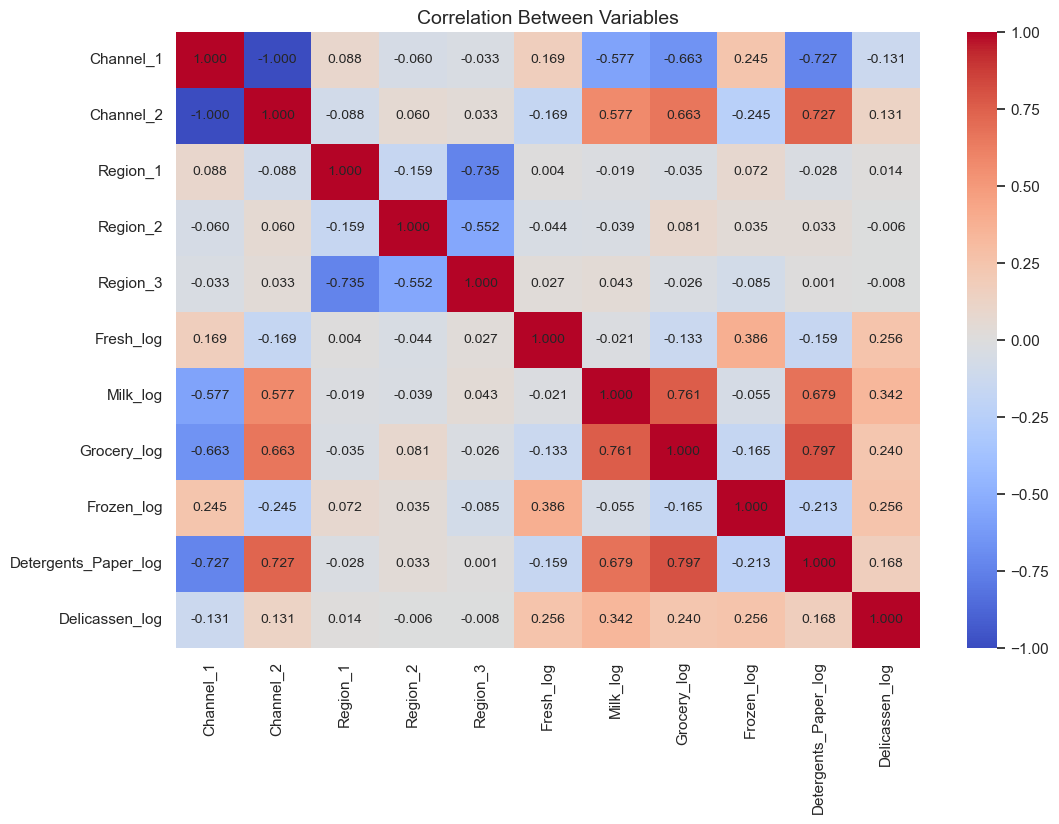

In [18]:
# correlation between all the variables
# calculate the correlation matrix to provide a graphical representation of data where values are depicted by colour
wholesale_log_scaled_corr_matrix = wholesale_log_scaled_df.corr()

plt.figure(figsize=(12, 8))
ax = sns.heatmap(wholesale_log_scaled_corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Between Variables', fontsize=14) # set the title and its size

# to display the correlation values in each cell, we can loop through each row and column
for i in range(wholesale_log_scaled_corr_matrix.shape[0]):
    for j in range(wholesale_log_scaled_corr_matrix.shape[1]):
        text = "{:.3f}".format(wholesale_log_scaled_corr_matrix.iloc[i, j])  # use .iloc to access elements
        # display the values (considered text) based on (x,y) coordinates and align them in the center 
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=10)

plt.show()

The correlation coefficient is measured on a scale that varies from -1 to +1, we will follow these guidelines:
* 1.00: perfect correlation
* 0.80 to 0.99: very strong correlation
* 0.60 to 0.79: strong correlation
* 0.40 to 0.59: moderate correlation
* 0.20 to 0.39: weak correlation
* 0.00 to 0.19: very weak correlation

In [19]:
# extract the values in the correlation matrix greater than 0.40 and less than 1
# calculate the correlation matrix for your dataset
wholesale_log_scaled_corr = wholesale_log_scaled_df.corr()

# get pairs of variables within correlation-value ranges
correlation_pairs = []

for i in range(wholesale_log_scaled_corr.shape[0]):
    for j in range(i + 1, wholesale_log_scaled_corr.shape[1]):
        var1 = wholesale_log_scaled_corr.columns[i]
        var2 = wholesale_log_scaled_corr.columns[j]
        correlation = wholesale_log_scaled_corr.iloc[i, j]
        
        if 0.40 < abs(correlation) < 1:
            correlation_pairs.append((var1, var2, correlation))

# sort the correlation pairs by the absolute correlation value
correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# display the list of variable pairs and their corresponding correlation values
for var1, var2, correlation in correlation_pairs:
    print(f"{var1} - {var2}: {correlation:.3f}")

Grocery_log - Detergents_Paper_log: 0.797
Milk_log - Grocery_log: 0.761
Region_1 - Region_3: -0.735
Channel_1 - Detergents_Paper_log: -0.727
Channel_2 - Detergents_Paper_log: 0.727
Milk_log - Detergents_Paper_log: 0.679
Channel_1 - Grocery_log: -0.663
Channel_2 - Grocery_log: 0.663
Channel_2 - Milk_log: 0.577
Channel_1 - Milk_log: -0.577
Region_2 - Region_3: -0.552


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

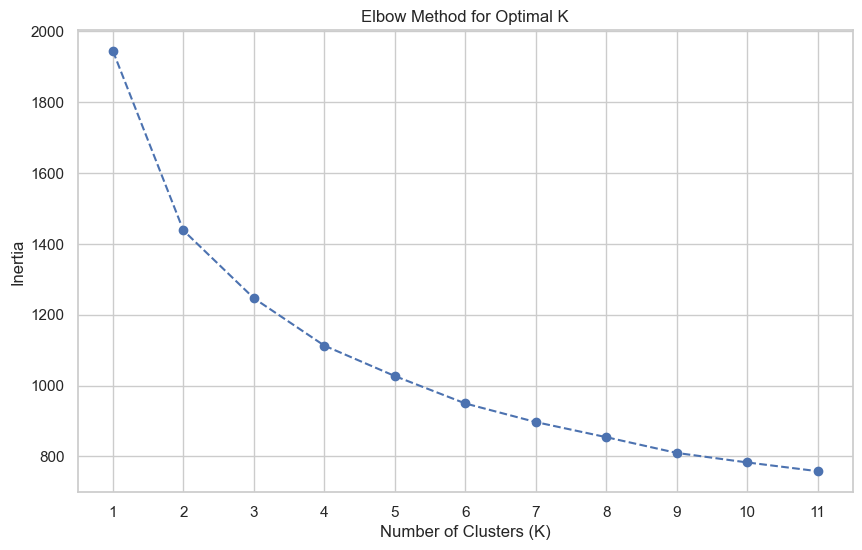

K1 = 1944.08
K2 = 1437.76
K3 = 1246.49
K4 = 1112.70
K5 = 1026.85
K6 = 949.45
K7 = 896.88
K8 = 854.25
K9 = 809.76
K10 = 782.90
K11 = 758.19


K2 - K1, difference: 506.32
K3 - K2, difference: 191.27
K4 - K3, difference: 133.79
K5 - K4, difference: 85.84
K6 - K5, difference: 77.41
K7 - K6, difference: 52.56
K8 - K7, difference: 42.63
K9 - K8, difference: 44.49
K10 - K9, difference: 26.87
K11 - K10, difference: 24.71


In [20]:
from sklearn.cluster import KMeans

# create a range of cluster numbers
num_clusters = range(1, 12)  # 1 to 11 clusters (11 maximum clusters because 11 columns)

# create an empty list to store the sum of squared distances (inertia) for each number of clusters
inertia = []

# fit K-Means for each cluster number and calculate the inertia
for n_clusters in num_clusters:
    # "init='k-means++'" parameter method usually leads to faster convergence
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(wholesale_log_scaled_df)
    inertia.append(kmeans.inertia_)

# plot the results on an "elbow" curve
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(num_clusters)
plt.show()

# print the inertia values and calculate differences
for i, inertia_value in enumerate(inertia):
    k_value = i + 1  # K values start from 1
    print(f"K{k_value} = {inertia_value:.2f}")

# calculate differences
differences = []

for i in range(1, len(inertia)):
    difference = inertia[i-1] - inertia[i]
    differences.append(difference)

print('\n')

# print the differences
for k, diff in enumerate(differences, start=2):
    print(f"K{k} - K{k-1}, difference: {diff:.2f}")

##### <br>Using the "elbow method" we can determine the optimal number of clusters. The "elbow" point in the plot, where the inertia starts to decrease at a slower rate (starts to level off), is often a good indicator of the optimal number of clusters.

##### We will select the optimal point 'k' to be 4 clusters.

In [21]:
# initialize K-Means algorithm with optimal k clusters
kmeans = KMeans(n_clusters=4, n_init=10000, random_state=42)

# fit K-Means to data
kmeans.fit(wholesale_log_scaled_df)

# assign data points to clusters
cluster_labels = kmeans.predict(wholesale_log_scaled_df)

In [22]:
# get cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# number of iterations required for convergence
num_iterations = kmeans.n_iter_

# number of data points in each cluster
cluster_sizes = pd.Series(cluster_labels).value_counts()

# display cluster centers and sizes
print("Cluster Centers:")
display(pd.DataFrame(cluster_centers, columns=wholesale_log_scaled_df.columns))
print("\nNumber of data points in each cluster:")
print(cluster_sizes)
print(f"\nNumber of iterations for convergence: {num_iterations}")
print(f"Inertia = {kmeans.inertia_}")

Cluster Centers:


,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh_log,Milk_log,Grocery_log,Frozen_log,Detergents_Paper_log,Delicassen_log
0,0.425926,0.574074,0.129630,0.129630,0.740741,-1.592288,0.167605,0.431658,-0.940209,0.418133,-1.074165
1,0.994152,0.005848,0.187135,0.076023,0.736842,-0.088142,-0.589828,-0.578515,-0.056658,-0.427810,-0.480429
2,0.962264,0.037736,0.226415,0.132075,0.641509,0.305640,0.029753,-0.035395,0.703412,-0.128382,0.465494
3,0.027523,0.972477,0.128440,0.119266,0.752294,-0.124483,0.617873,0.664876,-0.201372,0.715677,0.285417



Number of data points in each cluster:
1    171
3    109
2    106
0     54
Name: count, dtype: int64

Number of iterations for convergence: 8
Inertia = 1111.8421895058812


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

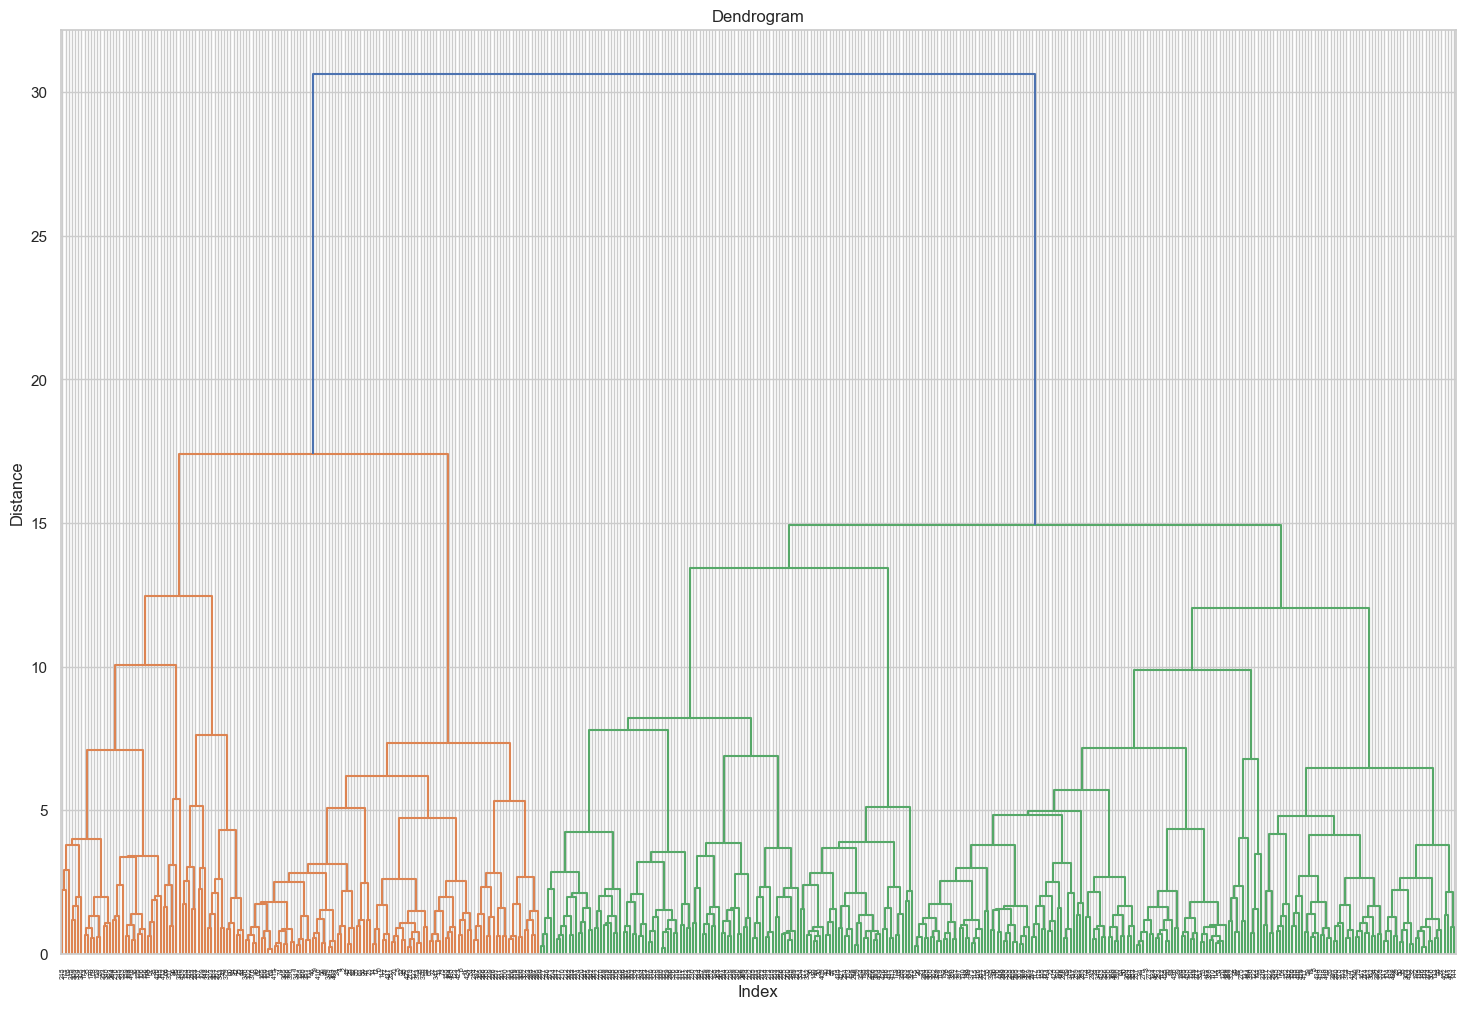

In [23]:
# creating dendrograms and performing hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage 
# AgglomerativeClustering algorithm for hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

# define the custom figure size
fig, ax = plt.subplots(figsize=(18, 12)) 

# distance metric and linkage method
distance_metric = 'euclidean' # measures the straight-line distance between two points
linkage_method = 'ward' # minimizes the variance when merging clusters

# create a dendrogram
# computer linkage matrix containing information about distances and order of merging clusters
linked = linkage(wholesale_log_scaled_df, method=linkage_method, metric=distance_metric)
# position the dendrogram at the top of the plot, sort the distances in descending order, and show data points in each leaf
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, ax=ax)

plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

##### There are various ways to determine the number of clusters in a dendrogram. For example, one can choose a threshold distance at which to cut the dendrogram. 

##### In this case, since we want to make a comparison with K-Means which we previously looked at, we will create 4 clusters.

In [24]:
# perform agglomerative clustering
num_clusters = 4  # optimal number of clusters
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity=distance_metric, linkage=linkage_method)
cluster_labels = agg_cluster.fit_predict(wholesale_log_scaled_df)

### Cluster Comparison

In [25]:
# compare cluster assignments between K-Means and Hierarchical Clustering
for i in range(num_clusters):
    kmeans_cluster_points = np.where(kmeans.labels_ == i)[0]
    hierarchical_cluster_points = np.where(cluster_labels == i)[0]

    # number of points in each cluster
    print(f"K-Means Cluster {i}: {len(kmeans_cluster_points)} points")
    print(f"Hierarchical Cluster {i}: {len(hierarchical_cluster_points)} points")

    # comparison of specific data points in each cluster
    common_points = len(set(kmeans_cluster_points).intersection(hierarchical_cluster_points))
    print(f"Common points in Cluster {i}: {common_points}\n")

K-Means Cluster 0: 54 points
Hierarchical Cluster 0: 118 points
Common points in Cluster 0: 2

K-Means Cluster 1: 171 points
Hierarchical Cluster 1: 58 points
Common points in Cluster 1: 1

K-Means Cluster 2: 106 points
Hierarchical Cluster 2: 93 points
Common points in Cluster 2: 1

K-Means Cluster 3: 109 points
Hierarchical Cluster 3: 171 points
Common points in Cluster 3: 2




The inconsistency between the two methods is primarily attributed to the limited number of shared data points between them.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

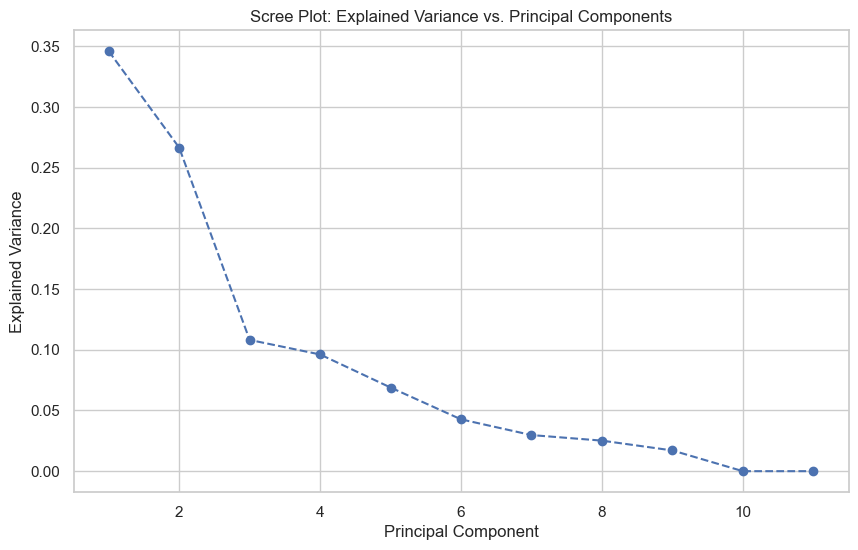

Component 1: explained variance = 0.3459
Component 2: explained variance = 0.2664
Component 3: explained variance = 0.1081
Component 4: explained variance = 0.0961
Component 5: explained variance = 0.0689
Component 6: explained variance = 0.0427
Component 7: explained variance = 0.0297
Component 8: explained variance = 0.0251
Component 9: explained variance = 0.0171
Component 10: explained variance = 0.0000
Component 11: explained variance = 0.0000


In [26]:
from sklearn.decomposition import PCA

# create a PCA instance
pca = PCA()

# fit PCA on your data
pca.fit(wholesale_log_scaled_df)

# get the explained variance ratio and components
explained_variance = pca.explained_variance_ratio_
components = pca.components_

# create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Scree Plot: Explained Variance vs. Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

# print components and their explained variance
for i, (variance, component) in enumerate(zip(explained_variance, components)):
    component_label = f'Component {i + 1}'
    explanation = f'explained variance = {variance:.4f}'
    print(f'{component_label}: {explanation}')

- Component 1 accounts for an explained variance of 0.3459, which implies that the first principal component explains approximately 34.59% of the total variance present in the original data.

- These percentage values indicate the extent to which each principal component captures the variability within the data. In general, components with higher explained variance values are more significant in terms of elucidating the structure and variance within the data.

- When deciding how many principal components to retain, one approach is to consider the cumulative explained variance. For example, if we keep the first 3 components, they collectively account for approximately 72.04% of the total variance. This means that by retaining these three components, we capture a substantial portion of the data's variability, which can be useful for dimensionality reduction and analysis

In [27]:
# instantiate the PCA model with "n_components=3"
pca = PCA(n_components=3)

# fit the model to data
pca.fit(wholesale_log_scaled_df)

# transform the data into the new feature space
pca_data = pca.transform(wholesale_log_scaled_df)

##### To identify the most important features or variables that contribute the most to the overall variance in the dataset, we can analyze the loadings (coefficients) of the original features in each of the three prinicipal components. Higher absolute loadings indicate a strong influence on that principal component.

In [28]:
# get the loadings for the first principal component
loadings = pca.components_[0]

# sort the loadings by absolute value in descending order
sorted_loadings = sorted(enumerate(loadings), key=lambda x: -abs(x[1]))

# Print the top contributing features
for feature_index, loading in sorted_loadings:
    print(f"Feature {wholesale_log_scaled_df.columns[feature_index]}: Loading = {loading}")

Feature Grocery_log: Loading = -0.5064786421433298
Feature Milk_log: Loading = -0.47249792293011794
Feature Detergents_Paper_log: Loading = -0.44751888020931274
Feature Channel_2: Loading = -0.30998852225973145
Feature Channel_1: Loading = 0.3099885222597314
Feature Delicassen_log: Loading = -0.21824385413521918
Feature Frozen_log: Loading = 0.21142749610997563
Feature Fresh_log: Loading = 0.18692894801475804
Feature Region_1: Loading = 0.018105325720064663
Feature Region_3: Loading = -0.00925273266479387
Feature Region_2: Loading = -0.00885259305527079


In [29]:
# get the loadings for the second principal component
loadings = pca.components_[1]

# sort the loadings by absolute value in descending order
sorted_loadings = sorted(enumerate(loadings), key=lambda x: -abs(x[1]))

# print the top contributing features
for feature_index, loading in sorted_loadings:
    print(f"Feature {wholesale_log_scaled_df.columns[feature_index]}: Loading = {loading}")

Feature Fresh_log: Loading = -0.5979330182296538
Feature Delicassen_log: Loading = -0.5843250046673404
Feature Frozen_log: Loading = -0.5199179077920648
Feature Milk_log: Loading = -0.1616514058255486
Feature Grocery_log: Loading = -0.05741706350645607
Feature Channel_2: Loading = 0.020862135096649005
Feature Channel_1: Loading = -0.020862135096648943
Feature Region_1: Loading = -0.015518484951034079
Feature Region_3: Loading = 0.012493760611407997
Feature Detergents_Paper_log: Loading = -0.004619940803429297
Feature Region_2: Loading = 0.0030247243396259566


In [30]:
# get the loadings for the third principal component
loadings = pca.components_[2]

# sort the loadings by absolute value in descending order
sorted_loadings = sorted(enumerate(loadings), key=lambda x: -abs(x[1]))

# print the top contributing features
for feature_index, loading in sorted_loadings:
    print(f"Feature {wholesale_log_scaled_df.columns[feature_index]}: Loading = {loading}")

Feature Fresh_log: Loading = -0.7215865942067928
Feature Delicassen_log: Loading = 0.6062057683142666
Feature Frozen_log: Loading = 0.1726988852347004
Feature Detergents_Paper_log: Loading = -0.14423740212048627
Feature Channel_1: Loading = 0.11631842698686075
Feature Channel_2: Loading = -0.11631842698686068
Feature Grocery_log: Loading = -0.107604739554187
Feature Region_3: Loading = -0.10123266317240709
Feature Milk_log: Loading = -0.07945185680142143
Feature Region_1: Loading = 0.0715281920390135
Feature Region_2: Loading = 0.02970447113339353


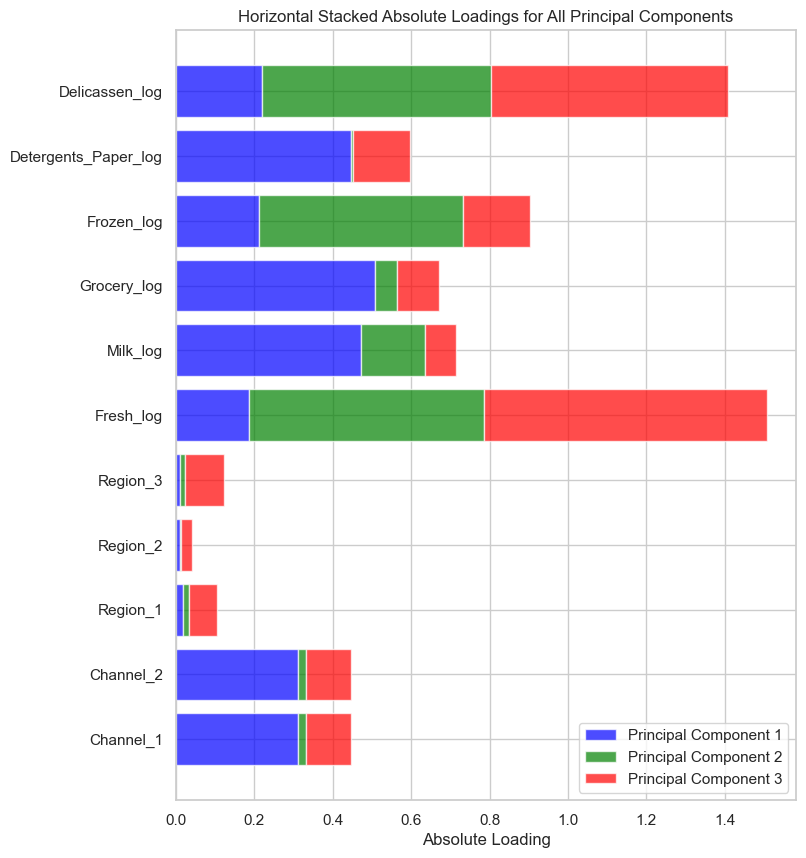

In [31]:
# get the loadings for all three principal components
loadings = pca.components_

# calculate the absolute loadings for each variable
abs_loadings = np.abs(loadings)

# assign colors to the principal components
colors = ['blue', 'green', 'red']

# create a horizontal stacked bar plot
fig, ax = plt.subplots(figsize=(8, 10))

# initialize a variable to keep track of the left position for stacking
left = np.zeros(len(wholesale_log_scaled_df.columns))

for i in range(3):
    # functio to create horizontal stacked bars
    ax.barh(
        range(len(wholesale_log_scaled_df.columns)),
        abs_loadings[i],
        alpha= 0.7,
        color=colors[i],
        label=f"Principal Component {i+1}",
        left=left
    )
    left += abs_loadings[i]

ax.set_title('Horizontal Stacked Absolute Loadings for All Principal Components')
ax.set_xlabel('Absolute Loading')
ax.set_yticks(range(len(wholesale_log_scaled_df.columns)))
ax.set_yticklabels(wholesale_log_scaled_df.columns)
ax.grid(True)
ax.legend()

plt.show()

Based on the stacked bar plot, it is evident that the bars representing "Fresh_log," "Delicassen_log," and "Frozen_log" exhibit the most significant combined influence compared to the other variables.








In [32]:
# list of features of interest
features_of_interest = ["Fresh_log", "Delicassen_log", "Frozen_log"]

# initialize sums for each feature
sums = {}
for feature in features_of_interest:
    sums[feature] = 0
    
# iterate through the three principal components
for i in range(3):
    
    # get the loadings for the current component
    loadings = pca.components_[i]

    # initialize a list to store the absolute loadings for the features of interest
    abs_loadings = []

    # calculate the absolute loadings for each feature of interest and sum them
    for j, feature in enumerate(features_of_interest):
        
        # get the index of the feature in the DataFrame columns
        feature_index = wholesale_log_scaled_df.columns.get_loc(feature)

        # calculate the absolute loading for the current feature
        abs_loading = abs(loadings[feature_index])

        # append the absolute loading to the abs_loadings list
        abs_loadings.append(abs_loading)

        # update the sums dictionary with the absolute loading for the current feature
        sums[feature] += abs_loading

# sum the individual feature sums across all components
overall_combined_influence = sum(sums.values())

# print the overall combined influence
for feature in features_of_interest:
    print(f"Feature {feature}: Overall Combined Influence = {sums[feature]}")

print(f"Overall Combined Influence of {', '.join(features_of_interest)} = {overall_combined_influence}")

Feature Fresh_log: Overall Combined Influence = 1.5064485604512048
Feature Delicassen_log: Overall Combined Influence = 1.4087746271168262
Feature Frozen_log: Overall Combined Influence = 0.9040442891367408
Overall Combined Influence of Fresh_log, Delicassen_log, Frozen_log = 3.8192674767047716


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- PCA Analysis: The PCA analysis reveals that "Fresh_log," "Delicatessen_log," and "Frozen_log" play significant roles in explaining the overall variance in customer spending. Understanding customer preferences and demands in these product categories is crucial for businesses.

- K-Means Cluster Sizes: The cluster analysis indicates that Cluster 1 is the largest, representing a prevalent customer type, while Cluster 0 is the smallest, potentially representing a niche market segment. Businesses should take these cluster sizes into account when allocating resources and planning marketing strategies.

- Hierarchical Clustering Dendrogram: The hierarchical clustering dendrogram illustrates how customers are grouped based on their spending patterns' similarities. This structure helps identify the hierarchy of customer segments and their relationships, aiding businesses in understanding both the clusters and their interconnections.

- PCA Dimensionality Reduction: PCA suggests that retaining the first 3 principal components preserves approximately 72.04% of the total variance. This implies that businesses can effectively reduce the data's dimensionality while retaining essential information for various analytical tasks and strategic decision-making.

- Correlations Between Product Categories: High correlations between certain product categories, such as the strong positive correlation between "Grocery_log" and "Detergents_Paper_log," indicate that changes in one category tend to be associated with changes in another. Businesses should consider these relationships when making decisions related to inventory and stocking.